In [5]:
# Installation of required libraries 
!pip install numpy pandas matplotlib seaborn scikit-learn
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report 

Step 1: Loading a Sample Dataset

•Scikit-learn provides built-in datasets for quick experimentation. 
We will use: 
• California Housing for regression 
• Iris Dataset for classification 

In [7]:
from sklearn.datasets import fetch_california_housing, load_iris 
# Load regression dataset 
housing = fetch_california_housing(as_frame=True) 
df_reg = housing.frame 
# Load classification dataset 
iris = load_iris(as_frame=True) 
df_cls = iris.frame 
print("Regression dataset shape:", df_reg.shape) 
print("Classification dataset shape:", df_cls.shape)

Regression dataset shape: (20640, 9)
Classification dataset shape: (150, 5)


 Step 2: Data Preprocessing and Splitting
 : Split the data into training and testing subsets to avoid overfitting.

In [8]:
# Regression example 
X_reg = df_reg.drop(columns=['MedHouseVal']) 
y_reg = df_reg['MedHouseVal'] 
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split( 
X_reg, y_reg, test_size=0.2, random_state=42 
) 
# Classification example 
X_cls = df_cls.drop(columns=['target']) 
y_cls = df_cls['target'] 
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split( 
X_cls, y_cls, test_size=0.25, random_state=42 
) 
print("Training samples (Regression):", X_train_reg.shape[0]) 
print("Training samples (Classification):", X_train_cls.shape[0])

Training samples (Regression): 16512
Training samples (Classification): 112


Step 3: Model Training and Evaluation 

A. Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression 
reg_model = LinearRegression() 
reg_model.fit(X_train_reg, y_train_reg) 
# Predictions 
y_pred_reg = reg_model.predict(X_test_reg) 
# Evaluation 
print("R² Score:", r2_score(y_test_reg, y_pred_reg))

R² Score: 0.5757877060324512


 B.Logistic Regression Model

In [10]:
log_model = LogisticRegression(max_iter=200) 
log_model.fit(X_train_cls, y_train_cls) 
# Predictions 
y_pred_cls = log_model.predict(X_test_cls) 
# Evaluation 
print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls)) 
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cls, 
y_pred_cls)) 
print("\nClassification Report:\n", classification_report(y_test_cls, 
y_pred_cls))

Accuracy: 1.0

Confusion Matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



 Step 4: Standardization and Pipelines

 Scikit-learn pipelines help chain preprocessing and modeling steps.

In [12]:
from sklearn.pipeline import Pipeline 
# Build a pipeline for regression 
pipeline = Pipeline([ 
('scaler', StandardScaler()), 
('model', LinearRegression()) 
]) 
pipeline.fit(X_train_reg, y_train_reg) 
y_pred_pipe = pipeline.predict(X_test_reg) 
print("Pipeline R² Score:", r2_score(y_test_reg, y_pred_pipe)) 

Pipeline R² Score: 0.5757877060324511


Step 5: Model Persistence 

You can save and reload trained models using joblib.

In [13]:
import joblib 
# Save model 
joblib.dump(reg_model, 'linear_model.pkl') 
# Load model 
loaded_model = joblib.load('linear_model.pkl') 
print("Loaded Model R²:", r2_score(y_test_reg, 
loaded_model.predict(X_test_reg)))

Loaded Model R²: 0.5757877060324512


Visualization of Predictions 

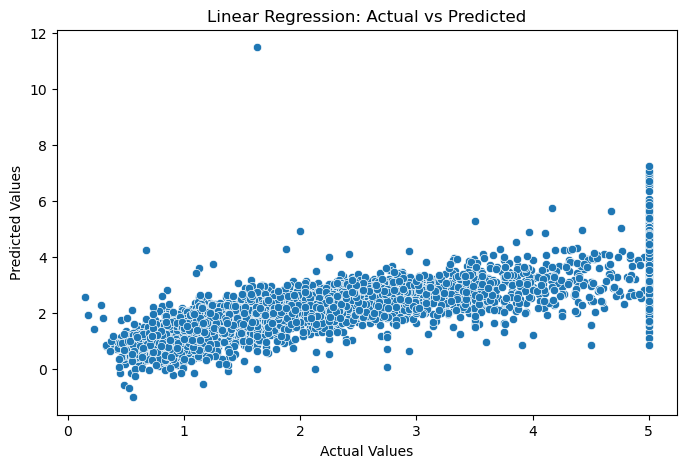

In [14]:
plt.figure(figsize=(8,5)) 
sns.scatterplot(x=y_test_reg, y=y_pred_reg) 
plt.xlabel("Actual Values") 
plt.ylabel("Predicted Values") 
plt.title("Linear Regression: Actual vs Predicted") 
plt.show() 